## Recurrence, Depth and High-dimensional data
# Python helper notebook

In this notebook we present specialized python functions that will be useful for this module, and verify your Keras and Scikit-learn environments. 

*Please execute the cell bellow in order to initialize the notebook environment*

In [2]:
%autosave 0
# %matplotlib inline
%matplotlib notebook

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mod3

plt.rcParams.update({'figure.figsize': (5.0, 4.0), 'lines.linewidth': 2.0})

Autosave disabled


ImportError: No module named mod3

## Functions `zip` and `enumerate`

In [3]:
x0 = [1, 2, 3]
x1 = np.array([4, 5, 6])

print 'Example of zip usage'
for item1, item2 in zip(x0, x1):
    print item1, item2

print '\nExample of enumerate usage'
for idx, item in enumerate(x1):
    print 'index:', idx, 'value:', item

Example of zip usage
1 4
2 5
3 6

Example of enumerate usage
index: 0 value: 4
index: 1 value: 5
index: 2 value: 6


## Looping through elements while excluding elements from another list

In [4]:
x0 = range(10)
x0_exclude = [4, 5, 6, 20]

x = [item for item in x0 if item not in x0_exclude]

print x

[0, 1, 2, 3, 7, 8, 9]


## Mesh grid and contour plot

In [5]:
w0_range = (1, 2, 3, 4)
w1_range = (5, 6, 7)

W0, W1 = np.meshgrid(w0_range, w1_range)

for label, data in (('w0_range', w0_range),
                    ('w1_range', w1_range),
                    ('W0', W0), 
                    ('W1', W1)):
    print label
    print data, '\n'

w0_range
(1, 2, 3, 4) 

w1_range
(5, 6, 7) 

W0
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]] 

W1
[[5 5 5 5]
 [6 6 6 6]
 [7 7 7 7]] 



<IPython.core.display.Javascript object>


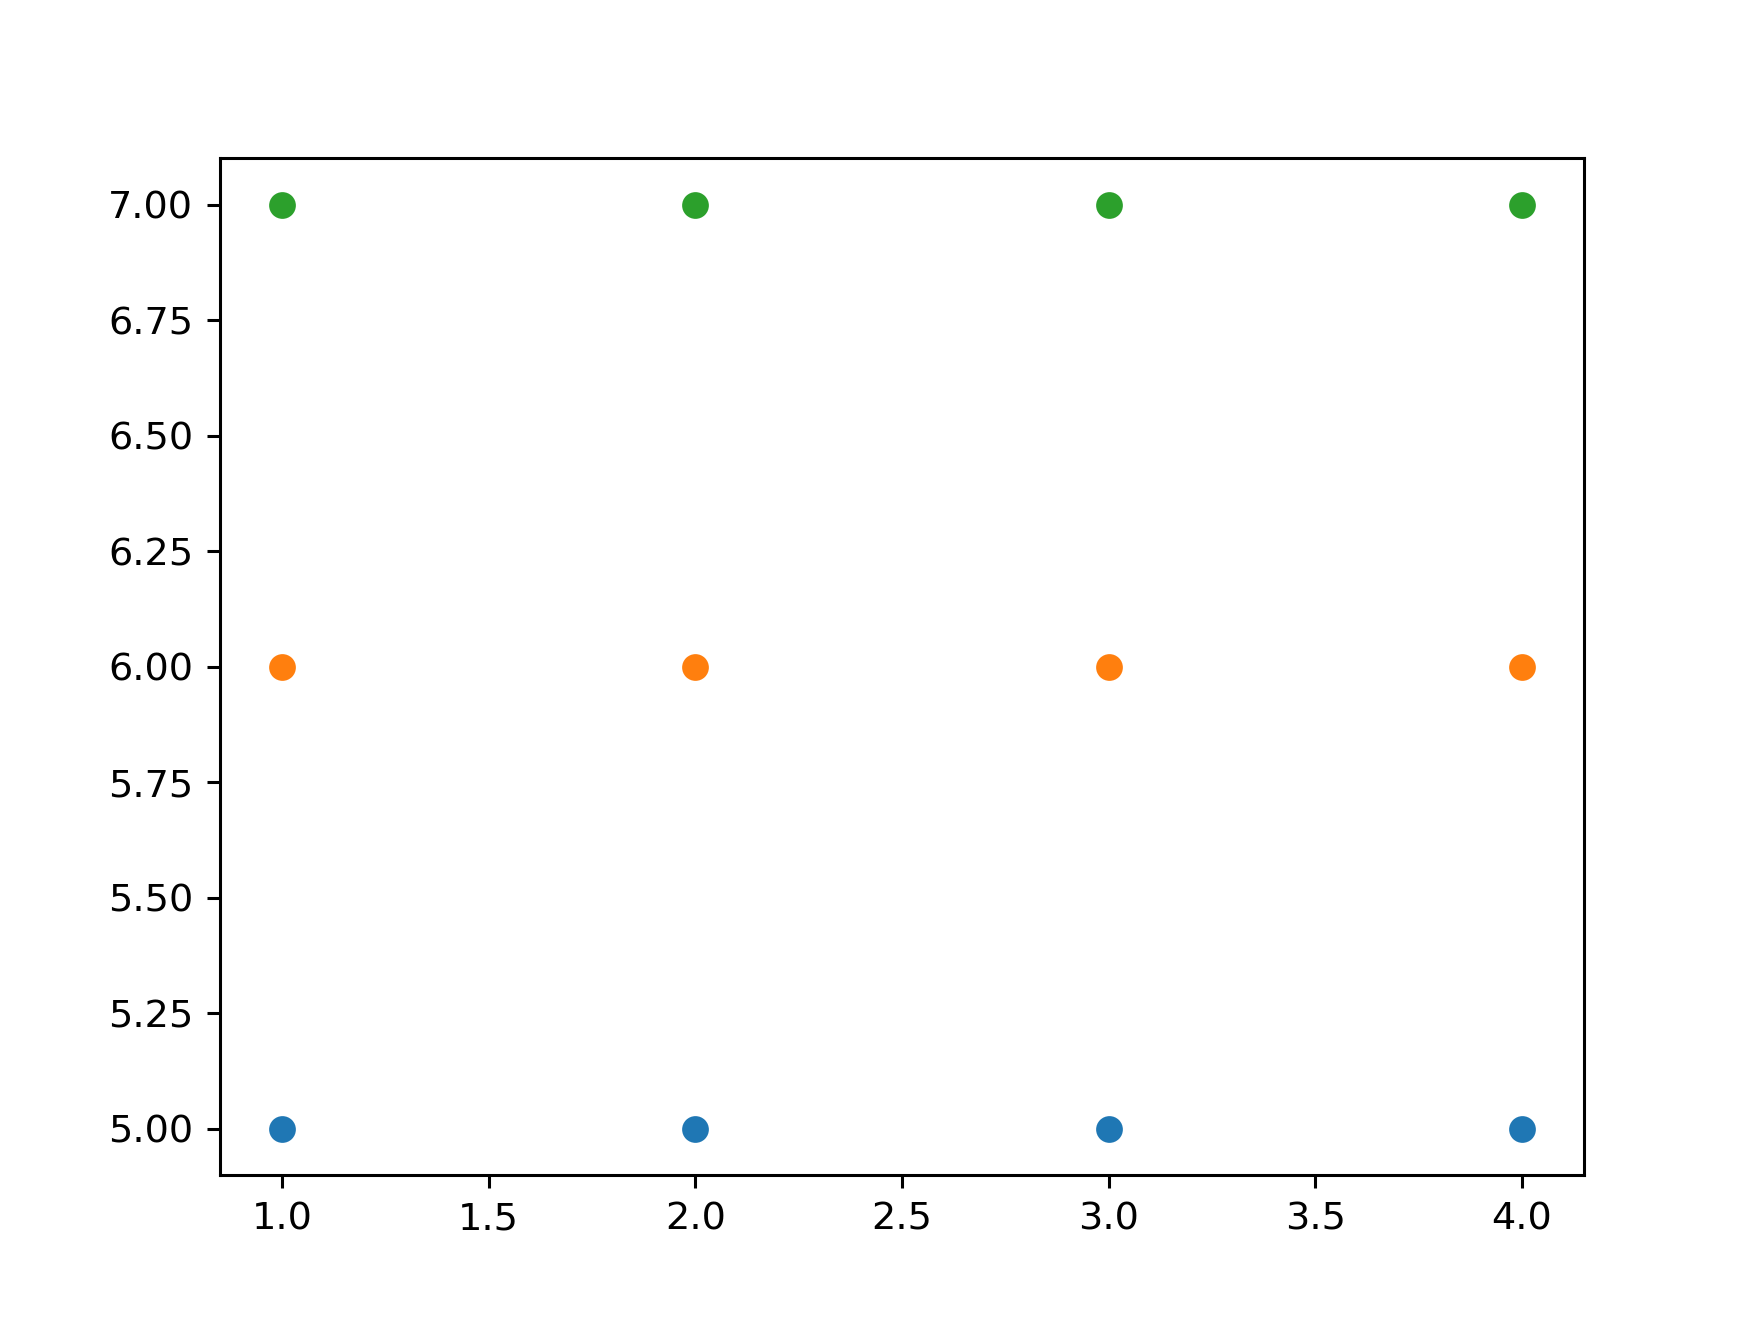

In [6]:
plt.figure()
for x, y in zip(W0, W1):
    plt.plot(x, y, 'o')

<IPython.core.display.Javascript object>


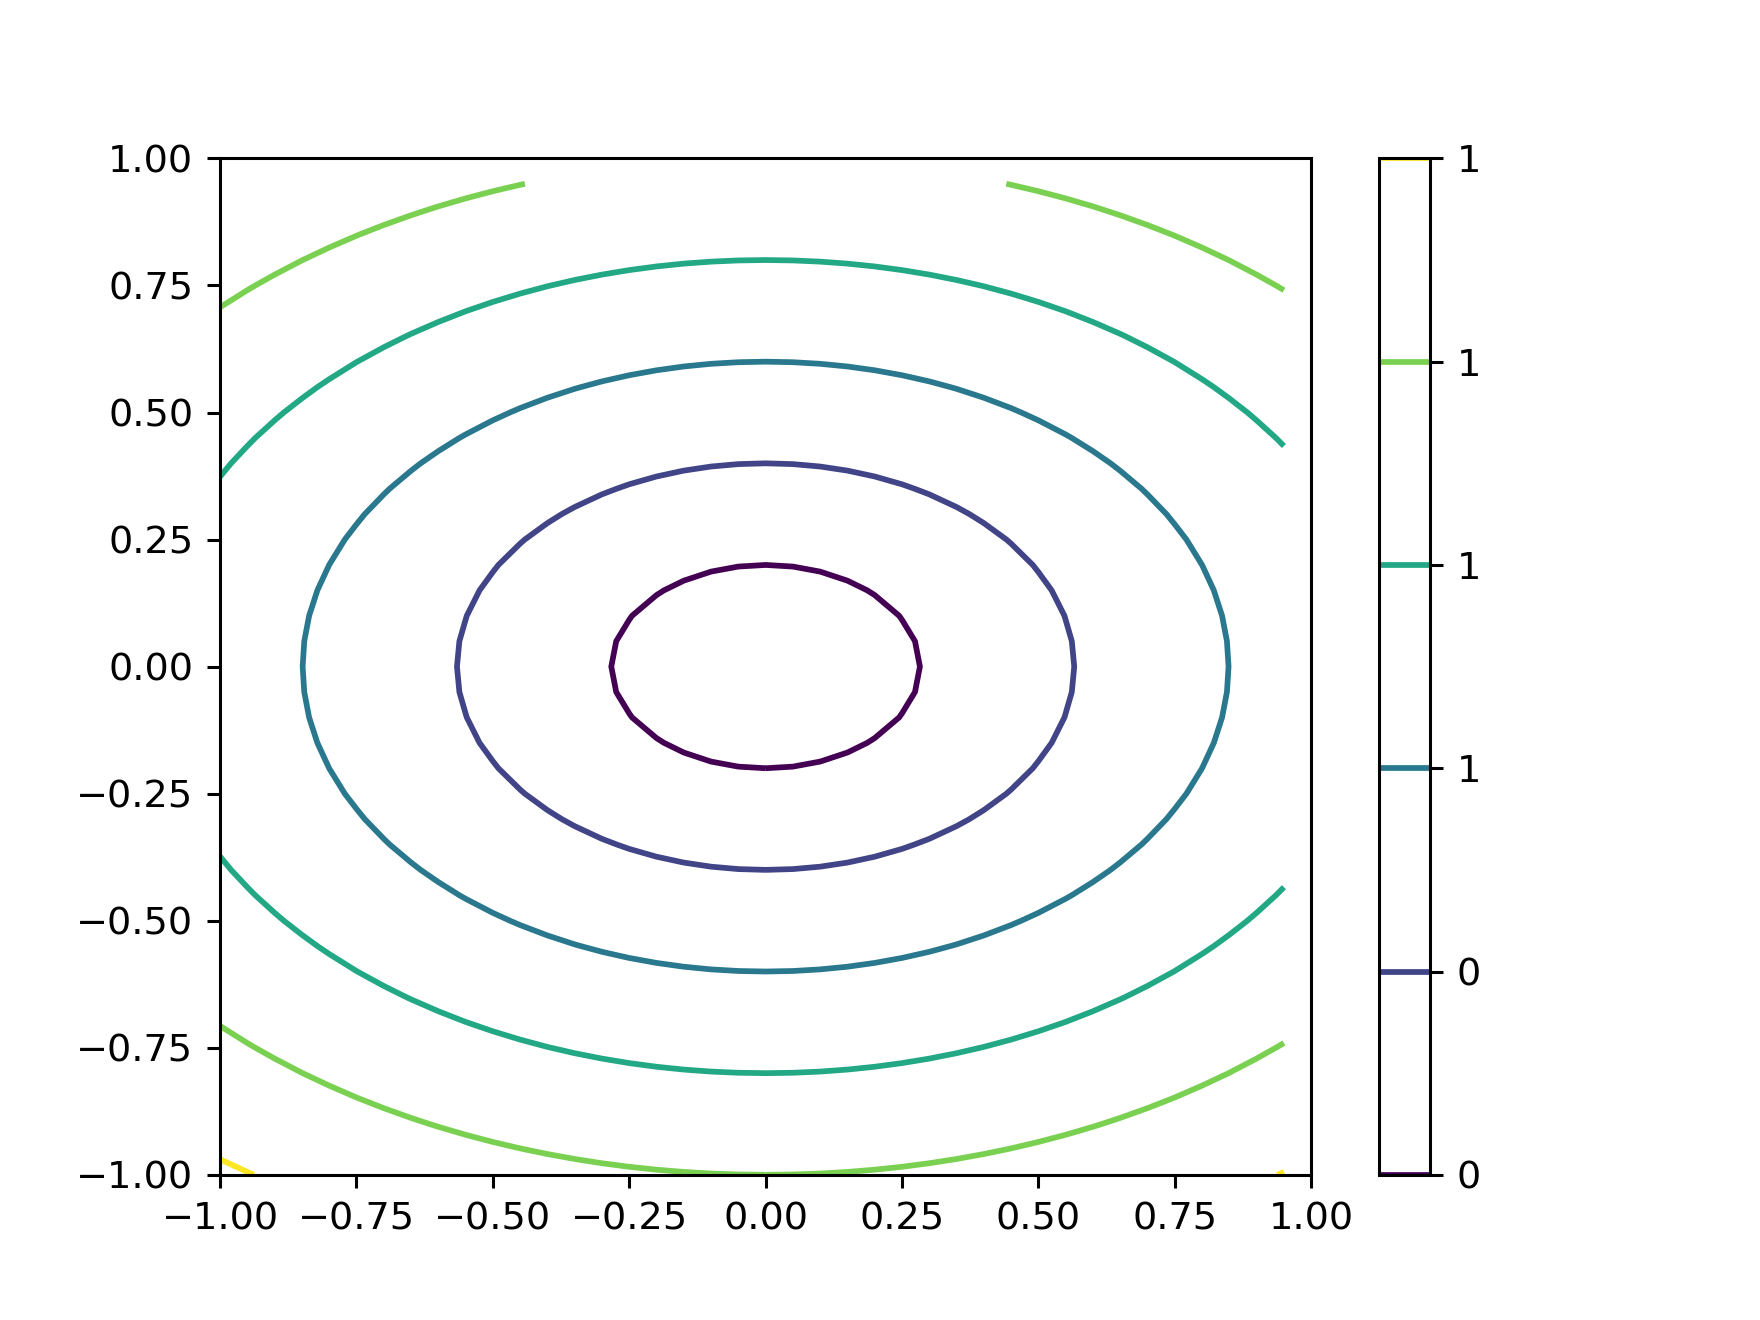

In [8]:
w0_range = np.arange(-1, 1, 0.05)

W0, W1 = np.meshgrid(w0_range, w0_range)

Z = np.sqrt(0.5*W0**2+W1**2)

plt.figure()
plt.contour(W0, W1, Z)
plt.colorbar(format='%.0f')
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.show()

## Subplots

<IPython.core.display.Javascript object>


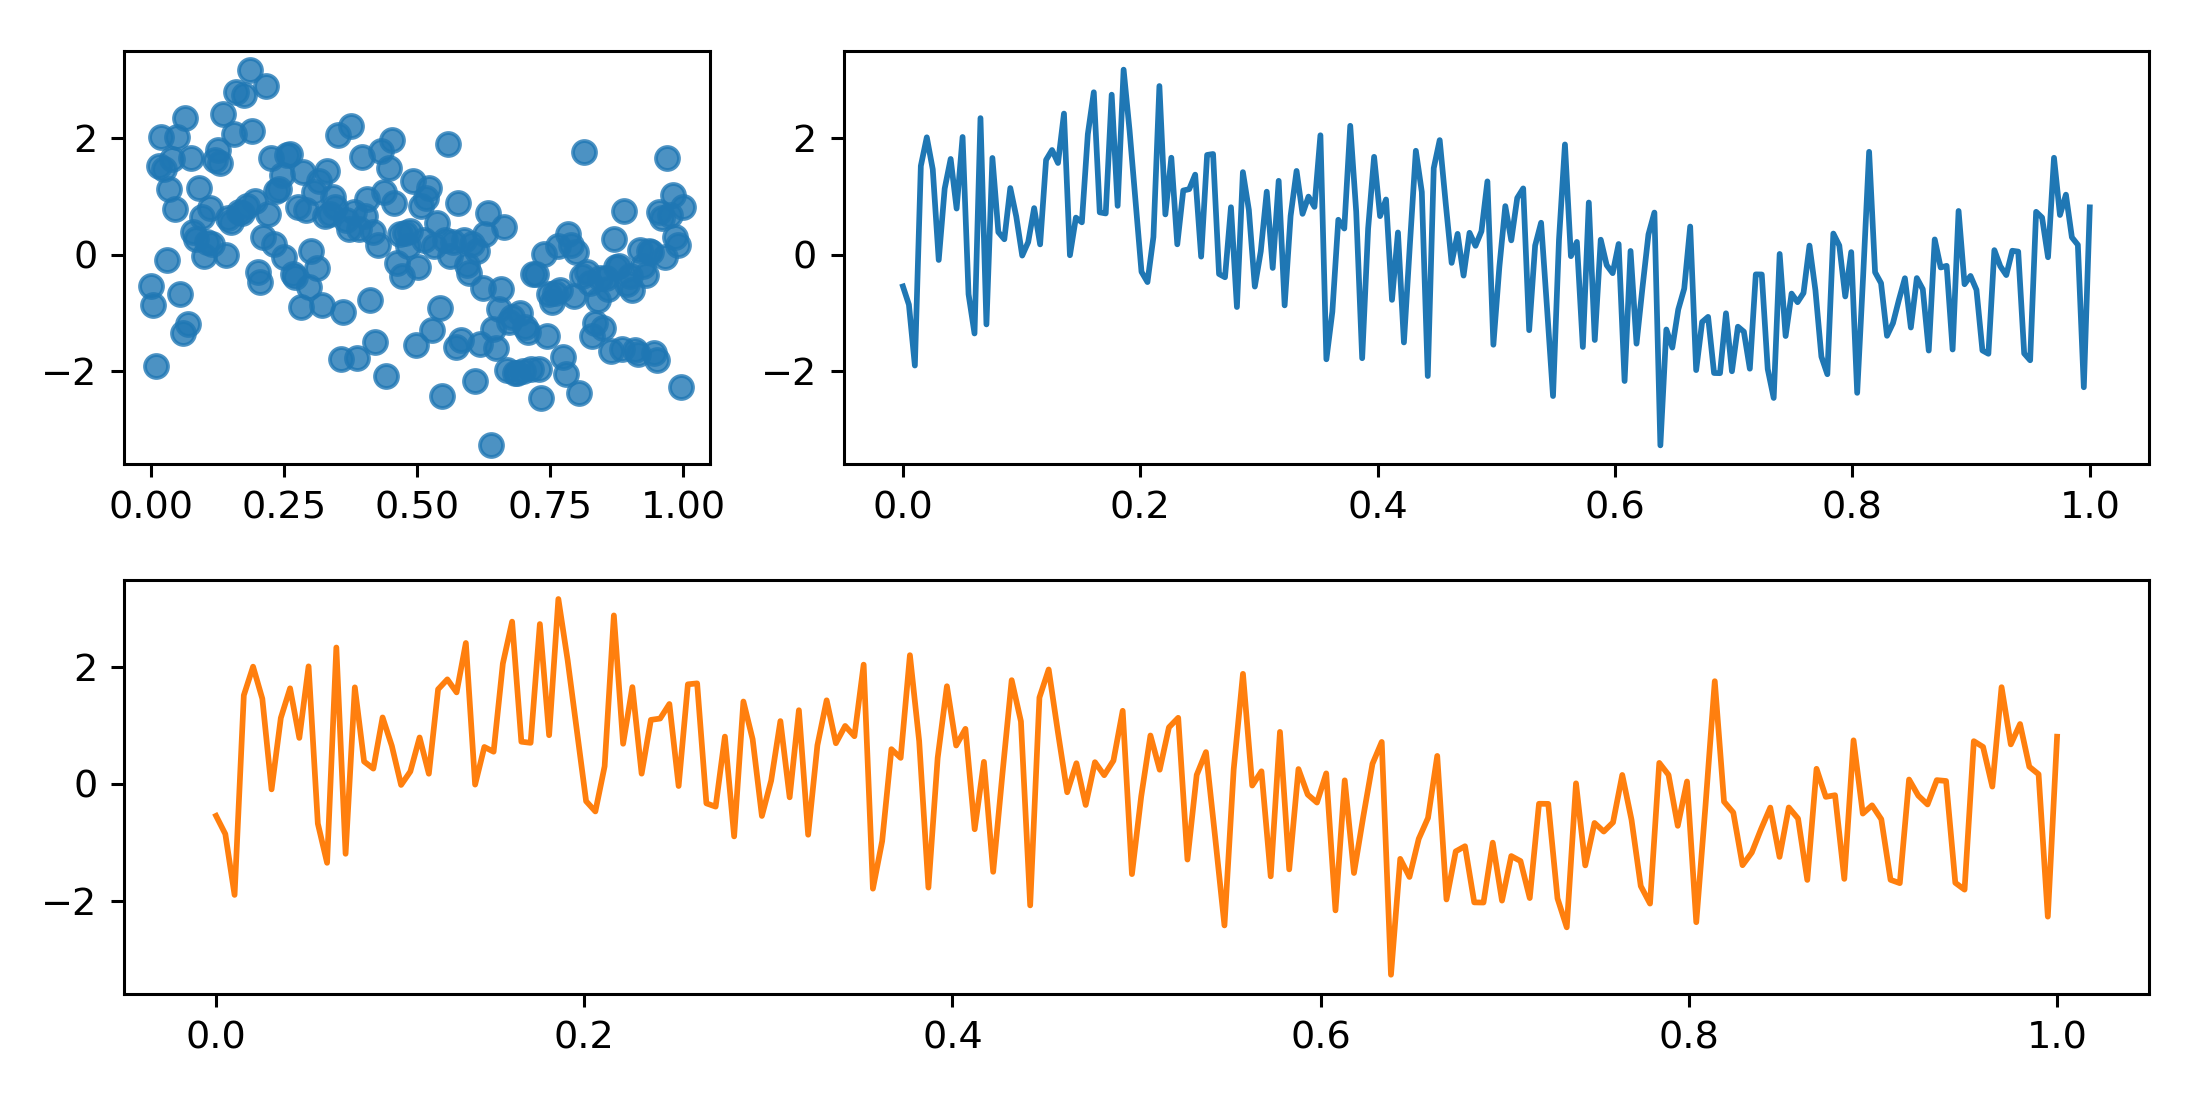

In [9]:
x = np.linspace(0, 1, num=200)
xi = np.random.randn(x.shape[0])
y = np.sin(2*np.pi*x) + xi

gs = gridspec.GridSpec(2, 3)

plt.figure(figsize=(8, 4))

plt.subplot(gs[0])
plt.plot(x, y, 'C0o', alpha=0.8)

plt.subplot(gs[0,1:])
plt.plot(x, y, 'C0')

plt.subplot(gs[1,:])
plt.plot(x, y, 'C1')

plt.tight_layout()
plt.show()

## Plot animations

<IPython.core.display.Javascript object>


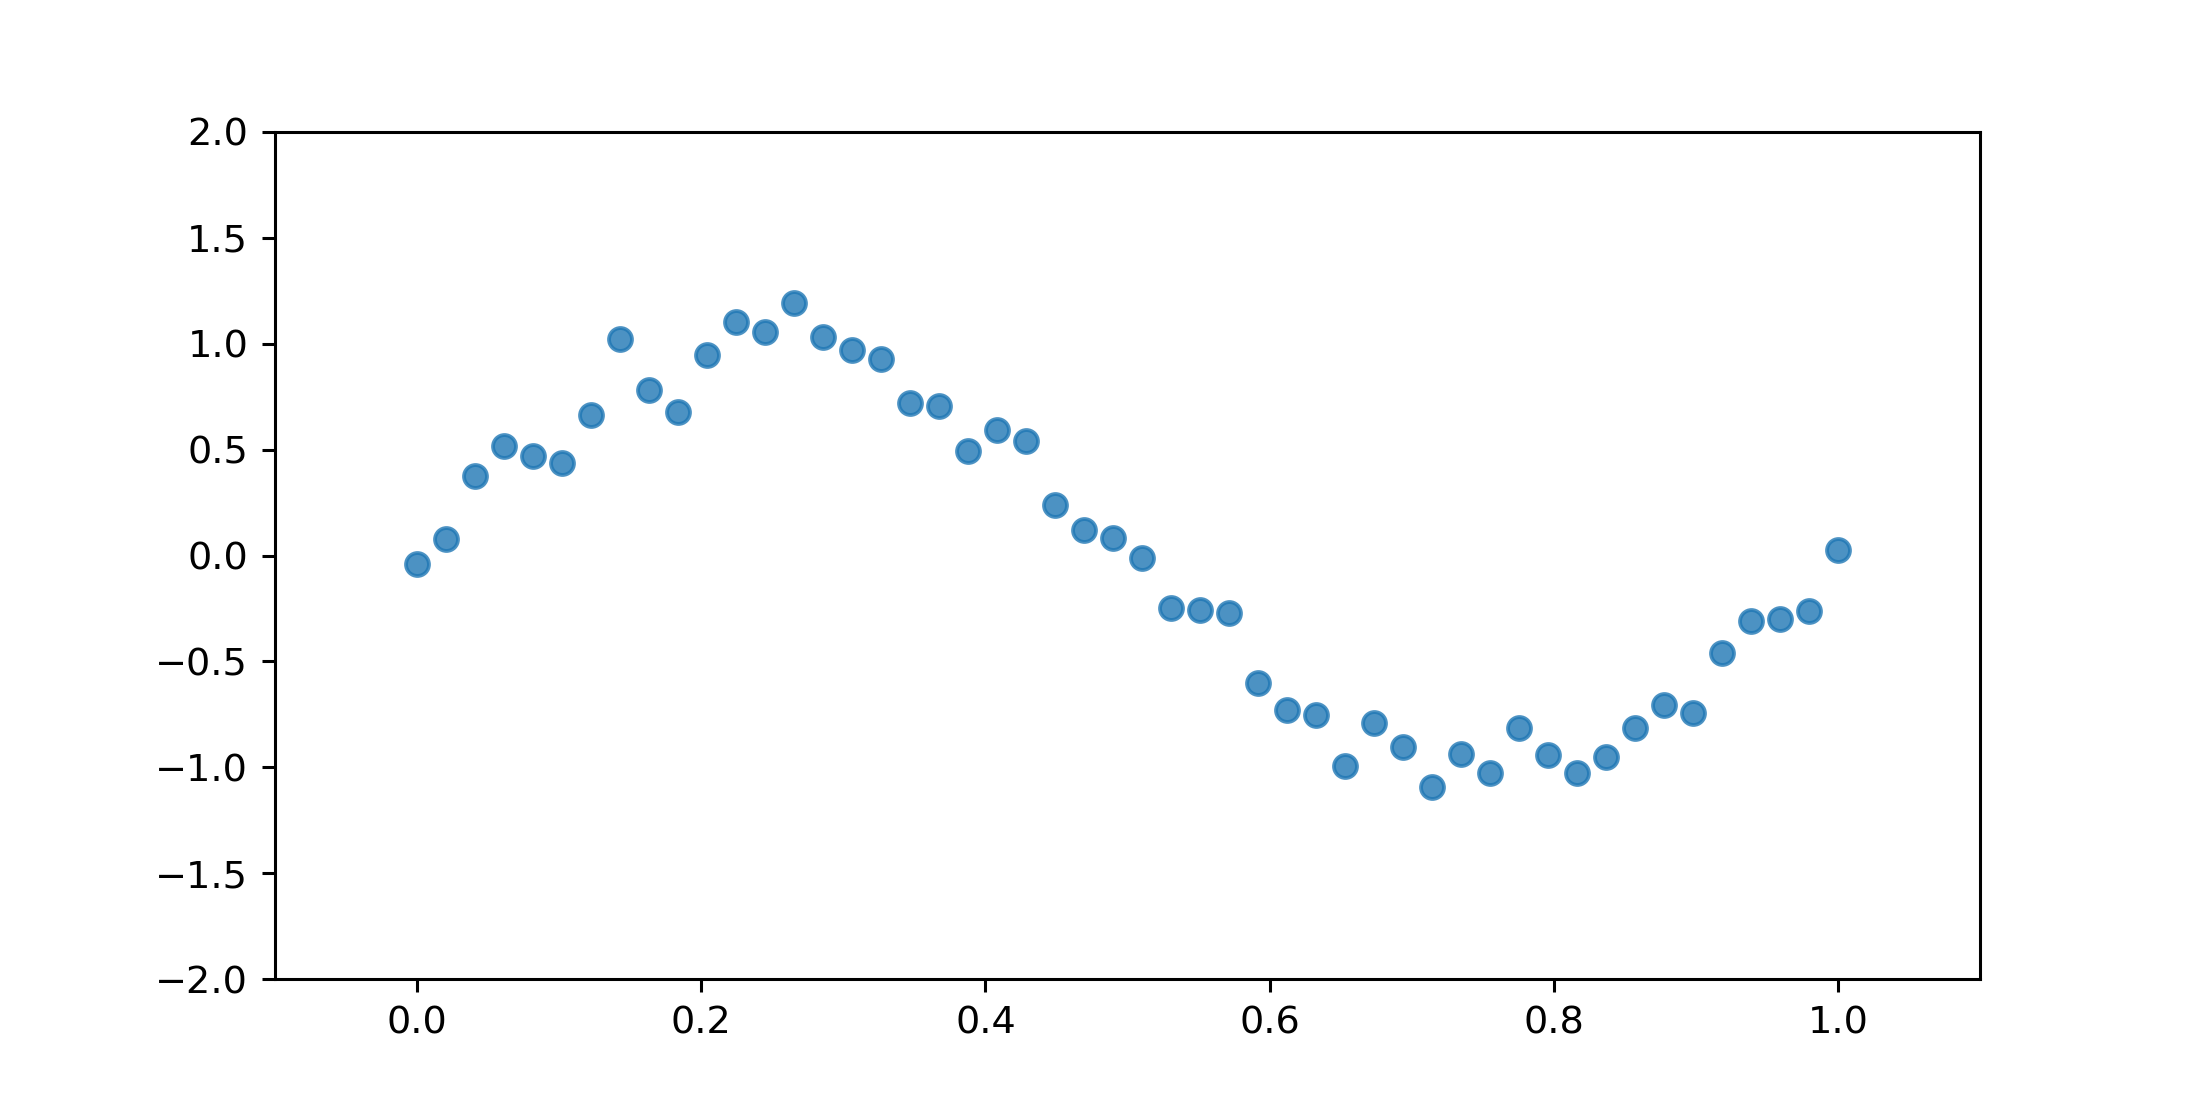

In [10]:
x = np.linspace(0, 1, num=50)
xi = 0.1*np.random.randn(x.shape[0])
y = np.sin(2*np.pi*x) + xi

fig = plt.figure(figsize=(8, 4))

plt.xlim([-0.1, 1.1])
plt.ylim([-2, 2])

for datum_x, datum_y in zip(x, y):
    plt.plot(datum_x, datum_y, 'C0o', alpha=0.8)
    fig.canvas.draw()

## Passing functions as arguments to functions

<IPython.core.display.Javascript object>


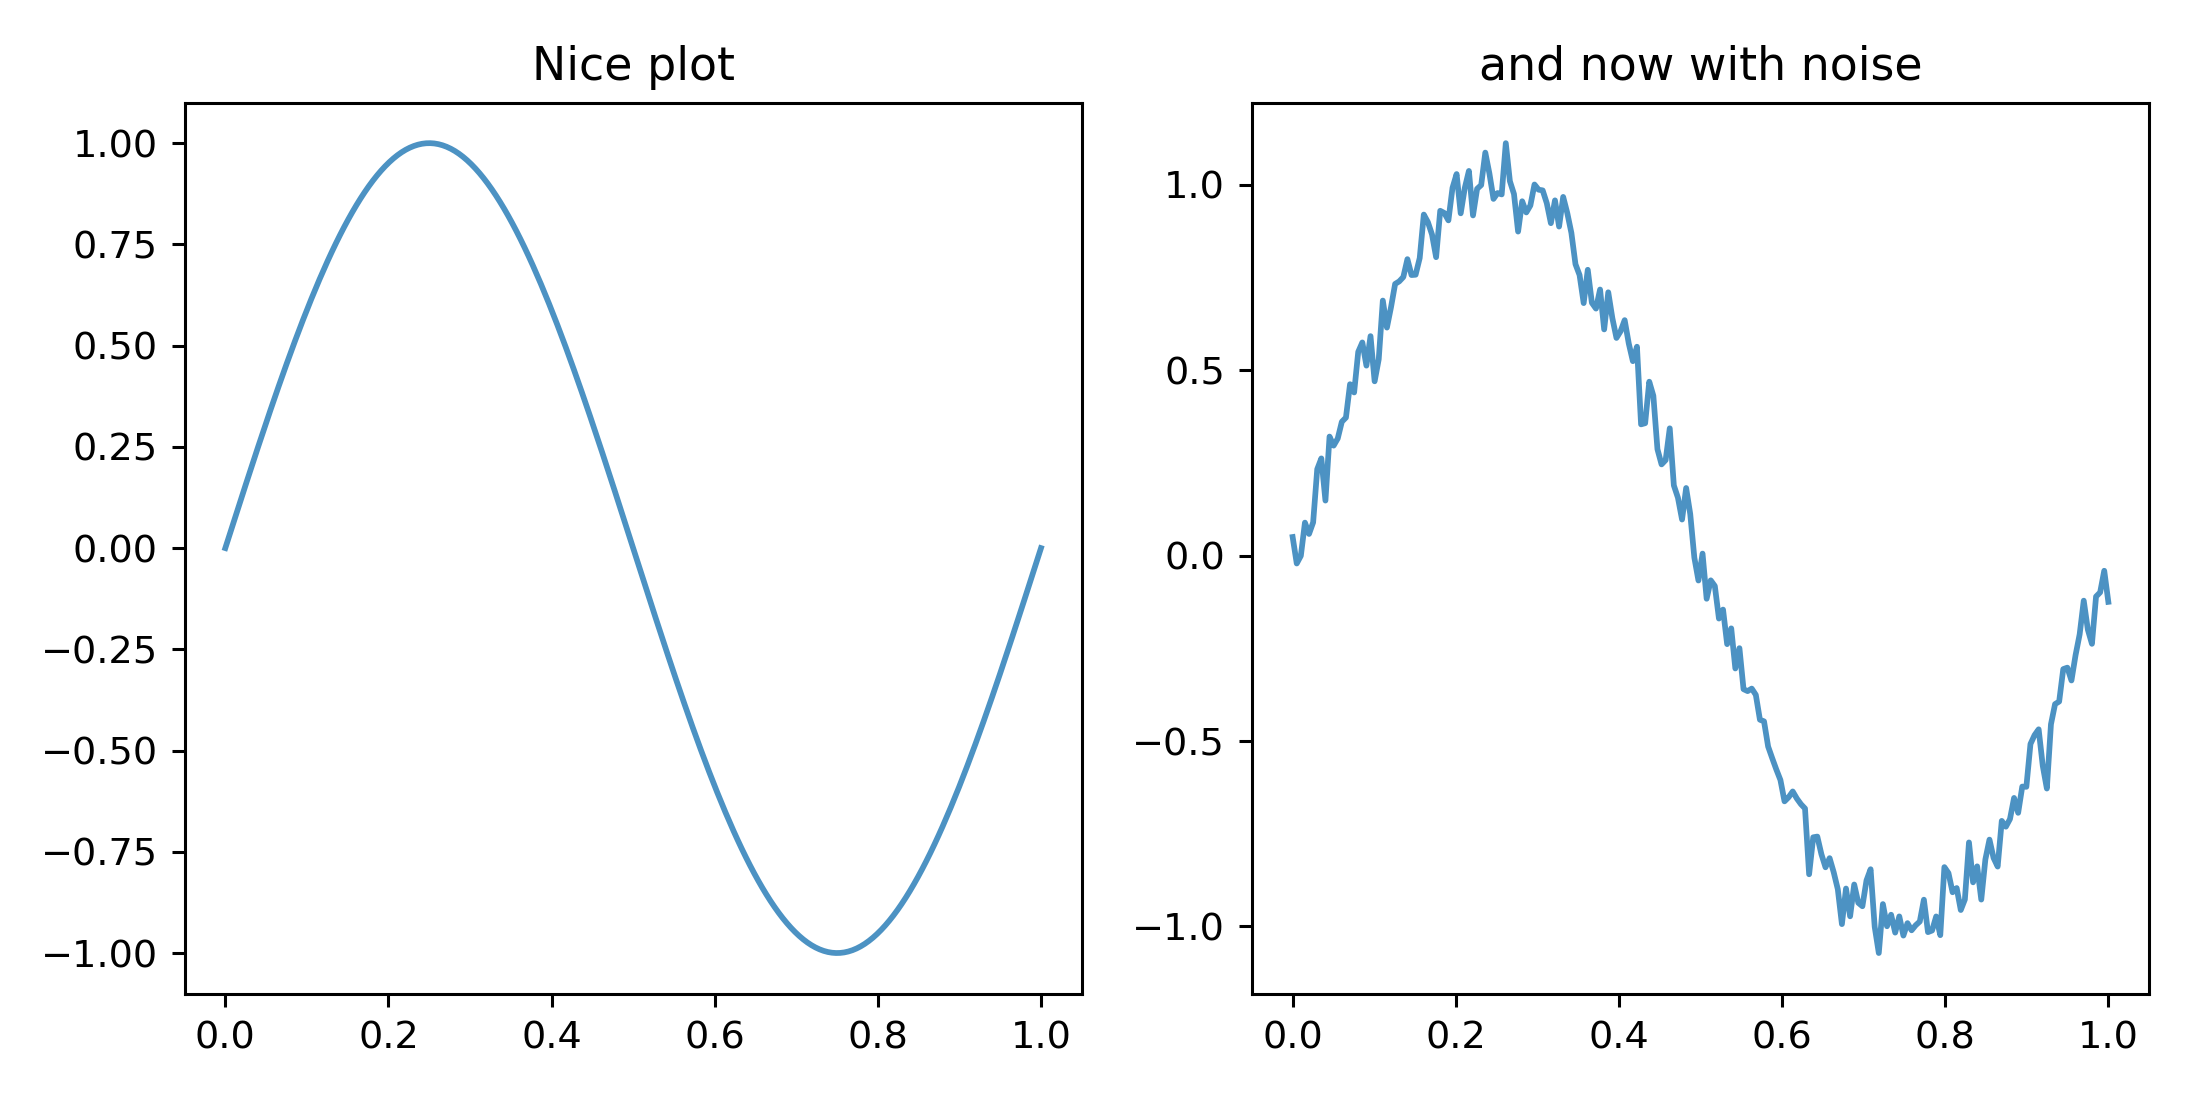

In [11]:
def nice_plot(x, fn, title=None):
    
    if title is None:
        title='Nice plot'

    plt.plot(x, fn(x), alpha=0.8)
    plt.title(title)
    
    return

def fn1(x, xi=None):
    if xi is None:
        xi = 0
    return np.sin(2*np.pi*x) + xi

x = np.linspace(0, 1, num=200)
xi = 0.05*np.random.randn(x.shape[0])

fn1_xi = lambda u: fn1(u, xi)

gs = gridspec.GridSpec(1, 2)

plt.figure(figsize=(8, 4))

plt.subplot(gs[0])
nice_plot(x, fn1)

plt.subplot(gs[1])
nice_plot(x, fn1_xi, title='and now with noise')

plt.tight_layout()
plt.show()

## Validate your Scikit environment

Run the cell below to validate your [scikit-learn](http://scikit-learn.org/stable/) environment. If this package is not installed in your [Anaconda](https://www.continuum.io/Anaconda-Overview) distribution, please execute the following command:

`conda install conda install scikit-learn
`

### Import package

In [12]:
import sklearn

print 'Version Scikit-learn', sklearn.__version__

Version Scikit-learn 0.18.1


**EXPECTED OUTPUT**
```
Version Scikit-learn 2.x.x
```

## Validate your Keras environment

### Import package

In [13]:
import keras
import tensorflow as tf

print 'Version Keras', keras.__version__
print 'Version Tensorflow', tf.__version__

Using TensorFlow backend.


Version Keras 2.0.2
Version Tensorflow 1.1.0


**EXPECTED OUTPUT**
```
Version Keras 2.x.x
Version Tensorflow 1.1.x
```

### Create a new network model

Run the cell below to validate your [Keras](https://keras.io) environment and download some necessary data. If this package is not installed in your [Anaconda](https://www.continuum.io/Anaconda-Overview) environment, please execute the following command:

`conda install keras`

In [14]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

(x_train, y_train), _ = mnist.load_data()

x_train = x_train.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)

input_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

input_img = Input(shape=(784,), name='Input')
x = Dense(64, activation='sigmoid', name='Hidden_1')(input_img)
output = Dense(10, activation='sigmoid', name='Output')(x)

model = Model(input_img, output)
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.summary()

history = model.fit(input_train, y_train, epochs=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 784)               0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 64)                50240     
_________________________________________________________________
Output (Dense)               (None, 10)                650       
Total params: 50,890.0
Trainable params: 50,890.0
Non-trainable params: 0.0
_________________________________________________________________
Epoch 1/1
60000/60000 [==============================] - 5s - loss: 0.1092 - acc: 0.1636     


**EXPECTED OUTPUT**
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
Input (InputLayer)           (None, 784)               0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 64)                50240     
_________________________________________________________________
Output (Dense)               (None, 10)                650       
=================================================================
Total params: 50,890.0
Trainable params: 50,890.0
Non-trainable params: 0.0
_________________________________________________________________
Epoch 1/1
60000/60000 [==============================] - 4s - loss: 0.1295 - acc: 0.2444     
```

### Visualizing network architecture graphs

Run the cell below to validate the packages supporting graph architecture visualization for Keras. If these packages are not installed in your [Anaconda](https://www.continuum.io/Anaconda-Overview) environment, please execute the following command:

`conda install pydot, graphviz`

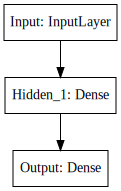

In [15]:
from IPython.display import display, SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

input_img = Input(shape=(784,))
encoded = Dense(8, activation='relu', name='encoded')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# save model graph
plot_model(model, to_file='ann_graph_test.png')

# plot model graph
display(SVG(model_to_dot(model).create(prog='dot', format='svg')))

**EXPECTED OUTPUT**
<img src="fig/ann_graph_test.png">

### Importing a pre-trained network model (VGG16)

This oneliner downloads a pre-trained VGG16 network model and instanciates it. If the download fails, please execute the following command:

`rm -rf .keras/models/vgg16_weights*`

In [13]:
from keras import applications

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
print('Model loaded.')